<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Dacon_%EC%8B%A0%EC%9A%A9_%EC%98%88%EC%B8%A1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import itertools

In [1]:
pip install plotly.express

In [2]:
pip install pywaffle

     |████████████████████████████████| 532kB 6.9MB/s 


In [3]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 271kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# **신용카드 사용자 연체 예측 AI 경진대회(Dacon)**

*   2021-04-10부터 시작(본인이)
*   신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 
*   신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측
*   이번 대회는 특이하게 심사기준이 Logloss(손실함수)이다.

index


gender: 성별


car: 차량 소유 여부


reality: 부동산 소유 여부


child_num: 자녀 수


income_total: 연간 소득


income_type: 소득 분류


							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



edu_type: 교육 수준


							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



family_type: 결혼 여부


							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



house_type: 생활 방식


							['Municipal apartment', 'House / apartment', 'With parents',

							

							 'Co-op apartment', 'Rented apartment', 'Office apartment']



DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



FLAG_MOBIL: 핸드폰 소유 여부


work_phone: 업무용 전화 소유 여부


phone: 전화 소유 여부


email: 이메일 소유 여부


occyp_type: 직업 유형													


family_size: 가족 규모


begin_month: 신용카드 발급 월
			

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







credit: 사용자의 신용카드 대금 연체를 기준의 신용도


							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함


In [231]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/test.csv')

In [170]:
sample = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/sample_submission.csv')

In [ ]:
print(f'train shape:{train.shape}, test shape:{test.shape}')

train shape:(26457, 20), test shape:(10000, 19)


In [214]:
data = pd.concat([train, test])

In [59]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,NaN
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,NaN
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,NaN
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


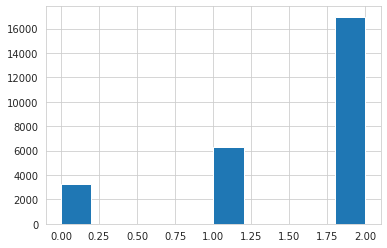

In [7]:
train.credit.hist()

In [ ]:
train.credit.value_counts()

2    16968
1     6267
0     3222
Name: credit, dtype: int64

In [171]:
from sklearn.utils import resample
train.credit = train.credit.astype(int)

In [172]:
a_credit = train[train.credit == 0]
b_credit = train[train.credit == 1]
c_credit = train[train.credit == 2]
a_oversampled = resample(a_credit, replace=True, n_samples=len(c_credit), random_state=123)
b_oversampled = resample(b_credit, replace=True, n_samples=len(c_credit), random_state=123)
train = pd.concat([c_credit, a_oversampled, b_oversampled], axis=0)

In [173]:
data = pd.concat([train,test], axis=0)

In [221]:
train.credit.value_counts()

2    16968
1    16968
0    16968
Name: credit, dtype: int64

In [ ]:
train.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       15570
family_size          0
begin_month          0
credit               0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [223]:
train_occyp_type = train['occyp_type']

In [231]:
test_occyp_type = test['occyp_type']

In [224]:
train = train.drop(['occyp_type'], axis=1)

In [232]:
test = test.drop(['occyp_type'], axis=1)

In [225]:
for i in train.select_dtypes(include='object'):
  lencoders=LabelEncoder()
  train[i] = lencoders.fit_transform(train[i])

In [233]:
for i in test.select_dtypes(include='object'):
  lencoders=LabelEncoder()
  test[i] = lencoders.fit_transform(test[i])

In [226]:
train = pd.concat([train_occyp_type, train], axis=1)

In [234]:
test = pd.concat([test_occyp_type, test], axis=1)

In [227]:
train_notnull = train[train['occyp_type'].notnull()]
test_null = train[train['occyp_type'].isnull()]
train_notnull['occyp_type'] = lencoders.fit_transform(train_notnull['occyp_type'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [228]:
Y=train_notnull['occyp_type']
X=train_notnull.drop(['occyp_type'], axis=1)

model_rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
model_rf.fit(X,Y)
predict = model_rf.predict(test_null.loc[:,'index':])

In [229]:
test_null['occyp_type'] = predict
## 결측치 처리완료(랜덤포레스트 예측값으로)

In [230]:
train = pd.concat([train_notnull, test_null], axis=0)

In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50904 entries, 2 to 10733
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occyp_type     50904 non-null  int64  
 1   index          50904 non-null  int64  
 2   gender         50904 non-null  int64  
 3   car            50904 non-null  int64  
 4   reality        50904 non-null  int64  
 5   child_num      50904 non-null  int64  
 6   income_total   50904 non-null  float64
 7   income_type    50904 non-null  int64  
 8   edu_type       50904 non-null  int64  
 9   family_type    50904 non-null  int64  
 10  house_type     50904 non-null  int64  
 11  DAYS_BIRTH     50904 non-null  int64  
 12  DAYS_EMPLOYED  50904 non-null  int64  
 13  FLAG_MOBIL     50904 non-null  int64  
 14  work_phone     50904 non-null  int64  
 15  phone          50904 non-null  int64  
 16  email          50904 non-null  int64  
 17  family_size    50904 non-null  float64
 18  begin_

In [235]:
train_notnull = test[test['occyp_type'].notnull()]
test_null = test[test['occyp_type'].isnull()]
train_notnull['occyp_type'] = lencoders.fit_transform(train_notnull['occyp_type'])

Y=train_notnull['occyp_type']
X=train_notnull.drop(['occyp_type'], axis=1)

model_rf = RandomForestClassifier(n_estimators=500, max_depth=10)
model_rf.fit(X,Y)
predict = model_rf.predict(test_null.loc[:,'index':])

test_null['occyp_type'] = predict

test = pd.concat([train_notnull, test_null], axis=0)
## test데이터 결측치 처리완료(랜덤포레스트 예측값으로)

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 9998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occyp_type     10000 non-null  int64  
 1   index          10000 non-null  int64  
 2   gender         10000 non-null  int64  
 3   car            10000 non-null  int64  
 4   reality        10000 non-null  int64  
 5   child_num      10000 non-null  int64  
 6   income_total   10000 non-null  float64
 7   income_type    10000 non-null  int64  
 8   edu_type       10000 non-null  int64  
 9   family_type    10000 non-null  int64  
 10  house_type     10000 non-null  int64  
 11  DAYS_BIRTH     10000 non-null  int64  
 12  DAYS_EMPLOYED  10000 non-null  int64  
 13  FLAG_MOBIL     10000 non-null  int64  
 14  work_phone     10000 non-null  int64  
 15  phone          10000 non-null  int64  
 16  email          10000 non-null  int64  
 17  family_size    10000 non-null  float64
 18  begin_m

In [192]:
data_credit = data['credit']

In [193]:
data = data.drop(['credit'], axis=1)

In [194]:
data_occyp_type = data['occyp_type']

In [195]:
data = data.drop(['occyp_type'], axis=1)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          36457 non-null  int64  
 1   gender         36457 non-null  object 
 2   car            36457 non-null  object 
 3   reality        36457 non-null  object 
 4   child_num      36457 non-null  int64  
 5   income_total   36457 non-null  float64
 6   income_type    36457 non-null  object 
 7   edu_type       36457 non-null  object 
 8   family_type    36457 non-null  object 
 9   house_type     36457 non-null  object 
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  FLAG_MOBIL     36457 non-null  int64  
 13  work_phone     36457 non-null  int64  
 14  phone          36457 non-null  int64  
 15  email          36457 non-null  int64  
 16  family_size    36457 non-null  float64
 17  begin_month    36457 non-null  float64
dtypes: floa

In [196]:
for i in data.select_dtypes(include='object').columns:
  encoders = LabelEncoder()
  data[i] = encoders.fit_transform(data[i])

In [197]:
data = pd.concat([data_occyp_type, data], axis=1)
data

,occyp_type,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,NaN,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,2.0,-6.0
1,Laborers,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,3.0,-5.0
2,Managers,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,2.0,-22.0
3,Sales staff,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,2.0,-37.0
4,Managers,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,2.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Accountants,36452,0,1,1,0,202500.0,4,2,1,1,-18593,-5434,1,1,1,0,2.0,-19.0
9996,Laborers,36453,1,1,1,0,202500.0,4,4,0,1,-10886,-1315,1,1,0,0,2.0,-34.0
9997,Medicine staff,36454,0,0,1,0,292500.0,4,4,1,1,-21016,-14018,1,0,0,0,2.0,-55.0
9998,NaN,36455,0,1,0,0,180000.0,0,4,1,1,-16541,-1085,1,0,1,0,2.0,-33.0


In [198]:
train_notnull = data[data.occyp_type.notnull()]
test_isnull = data[data.occyp_type.isnull()]

In [199]:
train_notnull['occyp_type'] = encoders.fit_transform(train_notnull['occyp_type'])

In [200]:
occyp_type_x = train_notnull.drop(['occyp_type'], axis=1)
occyp_type_y = train_notnull['occyp_type']

model = RandomForestClassifier(n_estimators=500)
model.fit(occyp_type_x, occyp_type_y)
predict = model.predict(test_isnull.loc[:,'index':])

In [201]:
test_isnull['occyp_type'] = predict

In [202]:
data = pd.concat([train_notnull, test_isnull])

In [203]:
data = data.sort_values(by='index')

In [204]:
data = pd.concat([data, data_credit], axis=1)

**occyp_type columns이 결측치가 있는데...**
> occyp_type 이 컬럼은 직업별 시각화를 통해서, income_total을 통해 결측치 처리

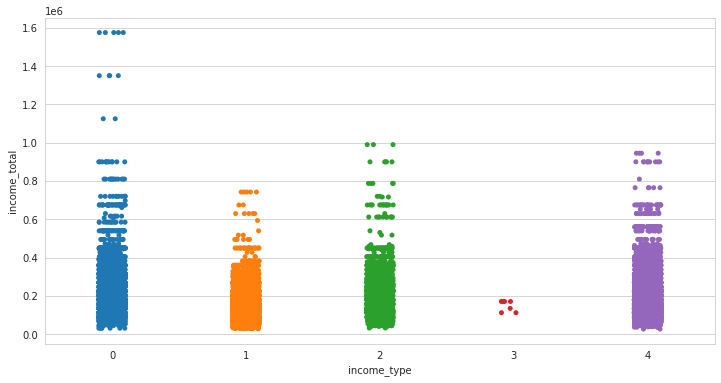

In [125]:
plt.figure(figsize=(12,6))
sns.stripplot(x='income_type', y=train['income_total'], data=train)

In [ ]:
train.groupby('income_type')['income_total'].median()

income_type
Commercial associate    189000.0
Pensioner               135000.0
State servant           180000.0
Student                 171000.0
Working                 157500.0
Name: income_total, dtype: float64

In [ ]:
train.groupby('occyp_type')['income_total'].median()

occyp_type
Accountants              180000.0
Cleaning staff           135000.0
Cooking staff            135000.0
Core staff               171000.0
Drivers                  202500.0
HR staff                 157500.0
High skill tech staff    180000.0
IT staff                 171000.0
Laborers                 162000.0
Low-skill Laborers       112500.0
Managers                 247500.0
Medicine staff           155250.0
Private service staff    180000.0
Realty agents            270000.0
Sales staff              157500.0
Secretaries              135000.0
Security staff           157500.0
Waiters/barmen staff     157500.0
Name: income_total, dtype: float64

# mode로 채워보자(결측치)

In [216]:
data['occyp_type'] = data['occyp_type'].fillna(data['occyp_type'].mode()[0])

In [203]:
train['occyp_type'].fillna(train['occyp_type'].mode()[0], inplace=True)
test['occyp_type'].fillna(test['occyp_type'].mode()[0], inplace=True)
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [30]:
train

,occyp_type,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
1,8,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,10,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,14,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,10,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,2.0,-26.0,2.0
5,6,5,0,0,1,2,270000.0,4,4,1,1,-13413,-4996,1,0,0,1,4.0,-18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,8,26439,0,0,1,0,67500.0,1,4,1,1,-19238,365243,1,0,0,0,2.0,-57.0,2.0
26441,3,26441,0,0,1,0,90000.0,1,2,2,1,-24129,365243,1,0,0,0,1.0,-43.0,2.0
26443,16,26443,0,0,1,0,90000.0,1,4,3,1,-22286,365243,1,0,0,0,1.0,-21.0,1.0
26449,14,26449,0,0,0,0,90000.0,4,4,1,1,-10498,-2418,1,1,1,0,2.0,-2.0,1.0


In [ ]:
data['occyp_type'].fillna(data['occyp_type'].mode()[0], inplace=True)

In [204]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for i in train.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  train[i] = lencoders[i].fit_transform(train[i])

for i in test.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  test[i] = lencoders[i].fit_transform(test[i])

In [223]:
lencoders = {}
for i in data.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  data[i] = lencoders[i].fit_transform(data[i])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

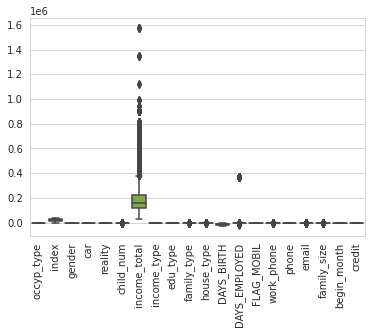

In [205]:
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [240]:
train = train.drop(['index'], axis=1)
test = test.drop(['index'], axis=1)

In [97]:
data = data.drop(['index'], axis=1)

In [206]:
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3 - Q1
IQR

occyp_type            7.0
index             18228.0
gender                1.0
car                   1.0
reality               1.0
child_num             1.0
income_total     103500.0
income_type           3.0
edu_type              3.0
family_type           0.0
house_type            0.0
DAYS_BIRTH         6976.0
DAYS_EMPLOYED      2745.0
FLAG_MOBIL            0.0
work_phone            0.0
phone                 1.0
email                 0.0
family_size           1.0
begin_month          27.0
credit                1.0
dtype: float64

In [241]:
Q3 = train.quantile(0.75)
Q1 = train.quantile(0.25)
IQR = Q3-Q1
IQR

occyp_type            7.0
gender                1.0
car                   1.0
reality               1.0
child_num             1.0
income_total     103500.0
income_type           3.0
edu_type              3.0
family_type           0.0
house_type            0.0
DAYS_BIRTH         7034.0
DAYS_EMPLOYED      2680.0
FLAG_MOBIL            0.0
work_phone            0.0
phone                 1.0
email                 0.0
family_size           1.0
begin_month          29.0
credit                2.0
dtype: float64

In [209]:
data['income_total'] = data['income_total'][~((data['income_total'] < (Q1['income_total']-1.5*IQR['income_total']))|(data['income_total']>(Q1['income_total']+1.5*IQR['income_total']))]

In [212]:
data.isnull().sum()

occyp_type           0
index                0
gender               0
car                  0
reality              0
child_num            0
income_total     36457
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

In [145]:
train = train.dropna(subset=['income_total'], axis=0)
## income_total만 이상치 제거하기

In [186]:
train = train[~((train < (Q1 - 1.5*IQR)) | (train > (Q3 + 1.5*IQR))).any(axis=1)]

In [211]:
data.shape

(36457, 20)

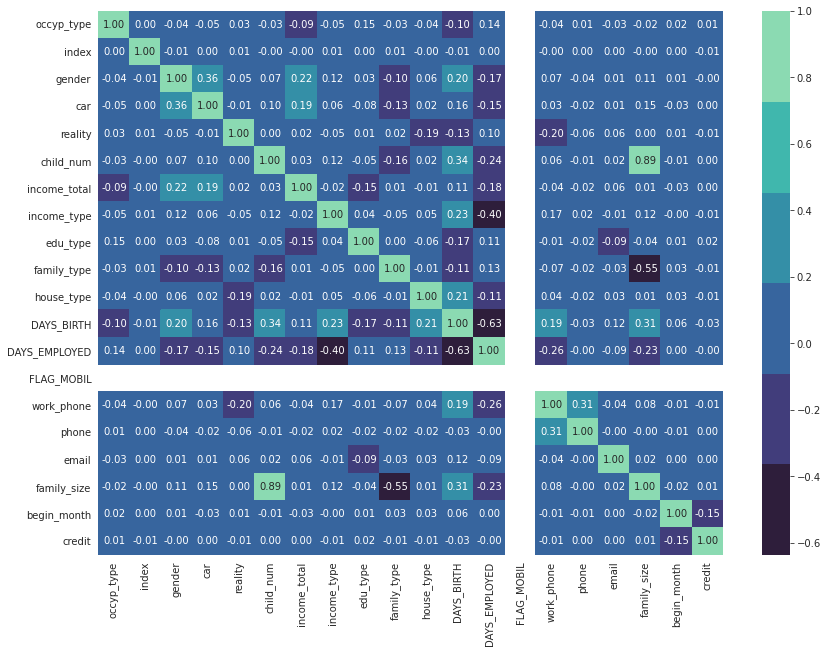

In [146]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(), annot=True, cmap=sns.color_palette('mako'), fmt='1.2f')

In [224]:
train = data[data.credit.notnull()]
test = data[data.credit.isnull()]
test = test.drop(['credit'], axis=1)

In [218]:
train.shape

(26457, 20)

In [225]:
x = train.drop(['credit'], axis=1)
y = train['credit']

In [220]:
from sklearn.preprocessing import robust_scale

In [221]:
scaler = robust_scale(x)
x = pd.DataFrame(scaler, columns=x.columns)

ValueError: ignored

In [107]:
from sklearn.model_selection import train_test_split

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=10086, stratify=y)

In [227]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, roc_auc_score, plot_confusion_matrix, log_loss, make_scorer
from sklearn.model_selection import GridSearchCV

In [228]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy: 0.708994708994709
cohen_kappa_score: 0.3356774054541347
              precision    recall  f1-score   support

         0.0       0.50      0.18      0.27       806
         1.0       0.66      0.39      0.49      1567
         2.0       0.73      0.93      0.82      4242

    accuracy                           0.71      6615
   macro avg       0.63      0.50      0.52      6615
weighted avg       0.69      0.71      0.67      6615



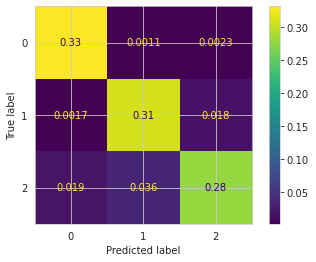

In [ ]:
plot_confusion_matrix(model_rf, x_test, y_test, normalize='all')

In [229]:
model_xgb = xgb.XGBClassifier(n_jobs=-1, max_depth=50)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_xgb))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

accuracy: 0.6970521541950113
cohen_kappa_score: 0.306148807283133
              precision    recall  f1-score   support

         0.0       0.47      0.15      0.23       806
         1.0       0.61      0.37      0.46      1567
         2.0       0.72      0.92      0.81      4242

    accuracy                           0.70      6615
   macro avg       0.60      0.48      0.50      6615
weighted avg       0.67      0.70      0.66      6615



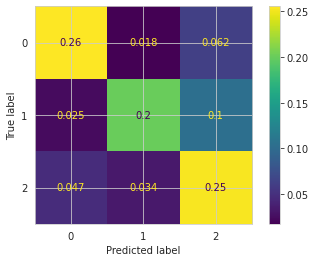

In [ ]:
plot_confusion_matrix(model_xgb, x_test, y_test, normalize='all')

In [230]:
model_lgbm = lgbm.LGBMClassifier(learning_rate=0.09, n_estimators=500)
model_lgbm.fit(x_train, y_train)
y_pred_lgbm = model_lgbm.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_lgbm))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

accuracy: 0.7027966742252456
cohen_kappa_score: 0.2789220533163729
              precision    recall  f1-score   support

         0.0       0.62      0.11      0.19       806
         1.0       0.68      0.30      0.41      1567
         2.0       0.71      0.96      0.82      4242

    accuracy                           0.70      6615
   macro avg       0.67      0.46      0.47      6615
weighted avg       0.69      0.70      0.65      6615



In [146]:
model_rf_proba = model_rf.predict_proba(x_test)
log_loss(y_test, model_rf_proba)

0.8331752702867476

In [147]:
model_xgb_proba = model_xgb.predict_proba(x_test)
log_loss(y_test, model_xgb_proba)

0.2886424312321927

In [145]:
model_lgbm_proba = model_lgbm.predict_proba(x_test)
log_loss(y_test, model_lgbm_proba)

0.7599480728456178

In [156]:
param_lgbm={'max_depth':np.arange(-1,20,1),
       'learning_rate':np.arange(0.05,0.1,0.01)}

model_lgbm = lgbm.LGBMClassifier()
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
grid_lgbm = GridSearchCV(model_lgbm, param_lgbm, cv=5, scoring=LogLoss)
grid_lgbm.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': array([0.05, 0.06, 0.07, 0.08, 0.09]),
             

In [157]:
print(grid_lgbm.best_params_)
print(grid_lgbm.best_score_)

{'learning_rate': 0.09000000000000001, 'max_depth': 12}
-0.7688421817413874


In [133]:
sample.iloc[:,1:]=0

In [127]:
for fold in range(5):
   sample.iloc[:,1:] += model_rf[fold].predict_proba(test)/5

In [128]:
sample.set_index('index').values.mean()
## 1차 0.333333333

0.3333333333333333

In [ ]:
sample.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/2021-04-13 3차', index=False) 

In [ ]:
##########################2차############################################

In [163]:
test_x = test

In [164]:
from sklearn.model_selection import KFold, StratifiedKFold
from keras.utils import to_categorical

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(x_train, y_train)):
        X_train, X_val = x_train.iloc[train_index], x_train.iloc[val_index]
        Y_train, Y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        clf.fit(X_train, Y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(Y_val), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(model_lgbm)

FOLD 0 : logloss:0.7770319466834629
FOLD 1 : logloss:0.7856806801086668
FOLD 2 : logloss:0.7608345211726192
FOLD 3 : logloss:0.7552736413904649
FOLD 4 : logloss:0.7524089122573441
Mean:0.7662459403225116


In [167]:
sample.loc[:,1:] = my_submission

In [168]:
sample

,index,0,1,2
0,26457,0.027921,0.050546,0.921533
1,26458,0.011692,0.034120,0.954187
2,26459,0.007898,0.029440,0.962662
3,26460,0.010037,0.068533,0.921429
4,26461,0.008565,0.059101,0.932334
...,...,...,...,...
9995,36452,0.011451,0.068713,0.919837
9996,36453,0.012235,0.061590,0.926175
9997,36454,0.016829,0.049041,0.934130
9998,36455,0.008966,0.050369,0.940664


In [144]:
sample.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/2021-04-14_6차.csv', index=False) 